In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from IPython.display import display, Markdown
pd.set_option('float_format', '{:.2f}'.format)

df = pd.read_pickle('../dataset/CIC-IDS-2017/CIC_IDS_2017_Monday.pkl')

In [7]:
def describe_mtimeseries(key, mtimeserie):
    display(Markdown(f'# {key}'))
    clean_ts = mtimeserie.dropna()
    # Data description ..... #
    start = clean_ts.index[0]
    end = clean_ts.index[-1]
    display(Markdown(f'Data range: {start} / {end} ({(end-start)})'))
    display(Markdown(f'Measurements available: {len(clean_ts)}'))
    display(clean_ts.describe())
    # Scaling ..... #
    clean_scaled_ts = clean_ts - clean_ts.min()
    clean_scaled_ts /= (clean_ts.max()-clean_ts.min())
    # Plotting clean data ..... #
    timeaxis = clean_scaled_ts.index.to_series().apply(lambda x: x.strftime('%a %d, %H:%M'))
    clean_scaled_ts.plot(subplots=True, figsize=(15,50))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(' %H:%M'))
    plt.gca().set_xticklabels(timeaxis)
    plt.show()
    
    # Nan Values ..... #
    nans = mtimeserie[mtimeserie.isnull().any(axis=1)]
    display(Markdown(f'Nan values {len(nans)}'))
    display(nans)
    
    display(Markdown(f"<br>{'-'*50}<br>{'-'*50}<br>"))

# Filling known missing values

In [8]:
df = df.fillna({"score": 0})

# Host Descripiton

# 192.168.10.12 (pc)

Data range: 2020-03-12 20:37:00 / 2020-03-13 04:47:30 (0 days 08:10:30)

Measurements available: 979

_field,alerts,bytes_rcvd,bytes_sent,bytes_sent_non_unicast,bytes_sent_unicast,flows_as_client,flows_as_server,lost_packets,num_as_client,num_as_server,num_flows,out_of_order_packets,packets_rcvd,packets_sent,queries_packets,replies_error_packets,replies_ok_packets,retransmission_packets,score
count,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00,979.00
mean,8.84,398641333.46,70936454.86,95554.44,2154469.40,19403.59,94.23,567.01,17.40,0.10,18849.70,519.31,171053.65,165896.27,21108.82,212.92,20901.51,4679.22,0.12
std,4.95,239878308.10,41907161.11,30489.81,1230405.69,11238.78,48.31,343.57,19.52,0.25,11028.81,300.86,102142.44,97272.98,12888.73,101.51,12795.34,2823.76,2.16
min,0.00,245313.00,423174.00,29293.00,79383.00,246.00,1.67,2.00,0.00,0.00,21.00,2.00,367.50,1022.00,170.00,28.00,142.00,68.00,0.00
25%,6.00,255258811.50,49021437.50,73438.00,1367250.33,13213.75,58.50,376.00,3.50,0.00,12814.00,326.67,113423.00,113386.83,13270.00,120.00,13154.00,2466.58,0.00
50%,7.00,346415091.00,61185141.00,96357.00,1847278.33,16931.33,107.00,507.00,9.50,0.00,16432.67,473.00,149584.50,145830.50,17440.67,236.00,17208.67,4783.00,0.00
75%,12.00,544663114.50,97304495.00,102779.00,2918640.50,26703.25,118.00,773.50,24.00,0.00,26025.08,707.00,232279.50,227812.42,29260.00,264.00,29004.00,6582.00,0.00
max,30.00,1348299444.00,229493946.00,219702.00,6974162.00,62320.33,262.00,1990.00,110.50,2.33,60884.00,1824.00,566410.00,540610.00,70768.00,608.00,70176.00,15576.00,41.00


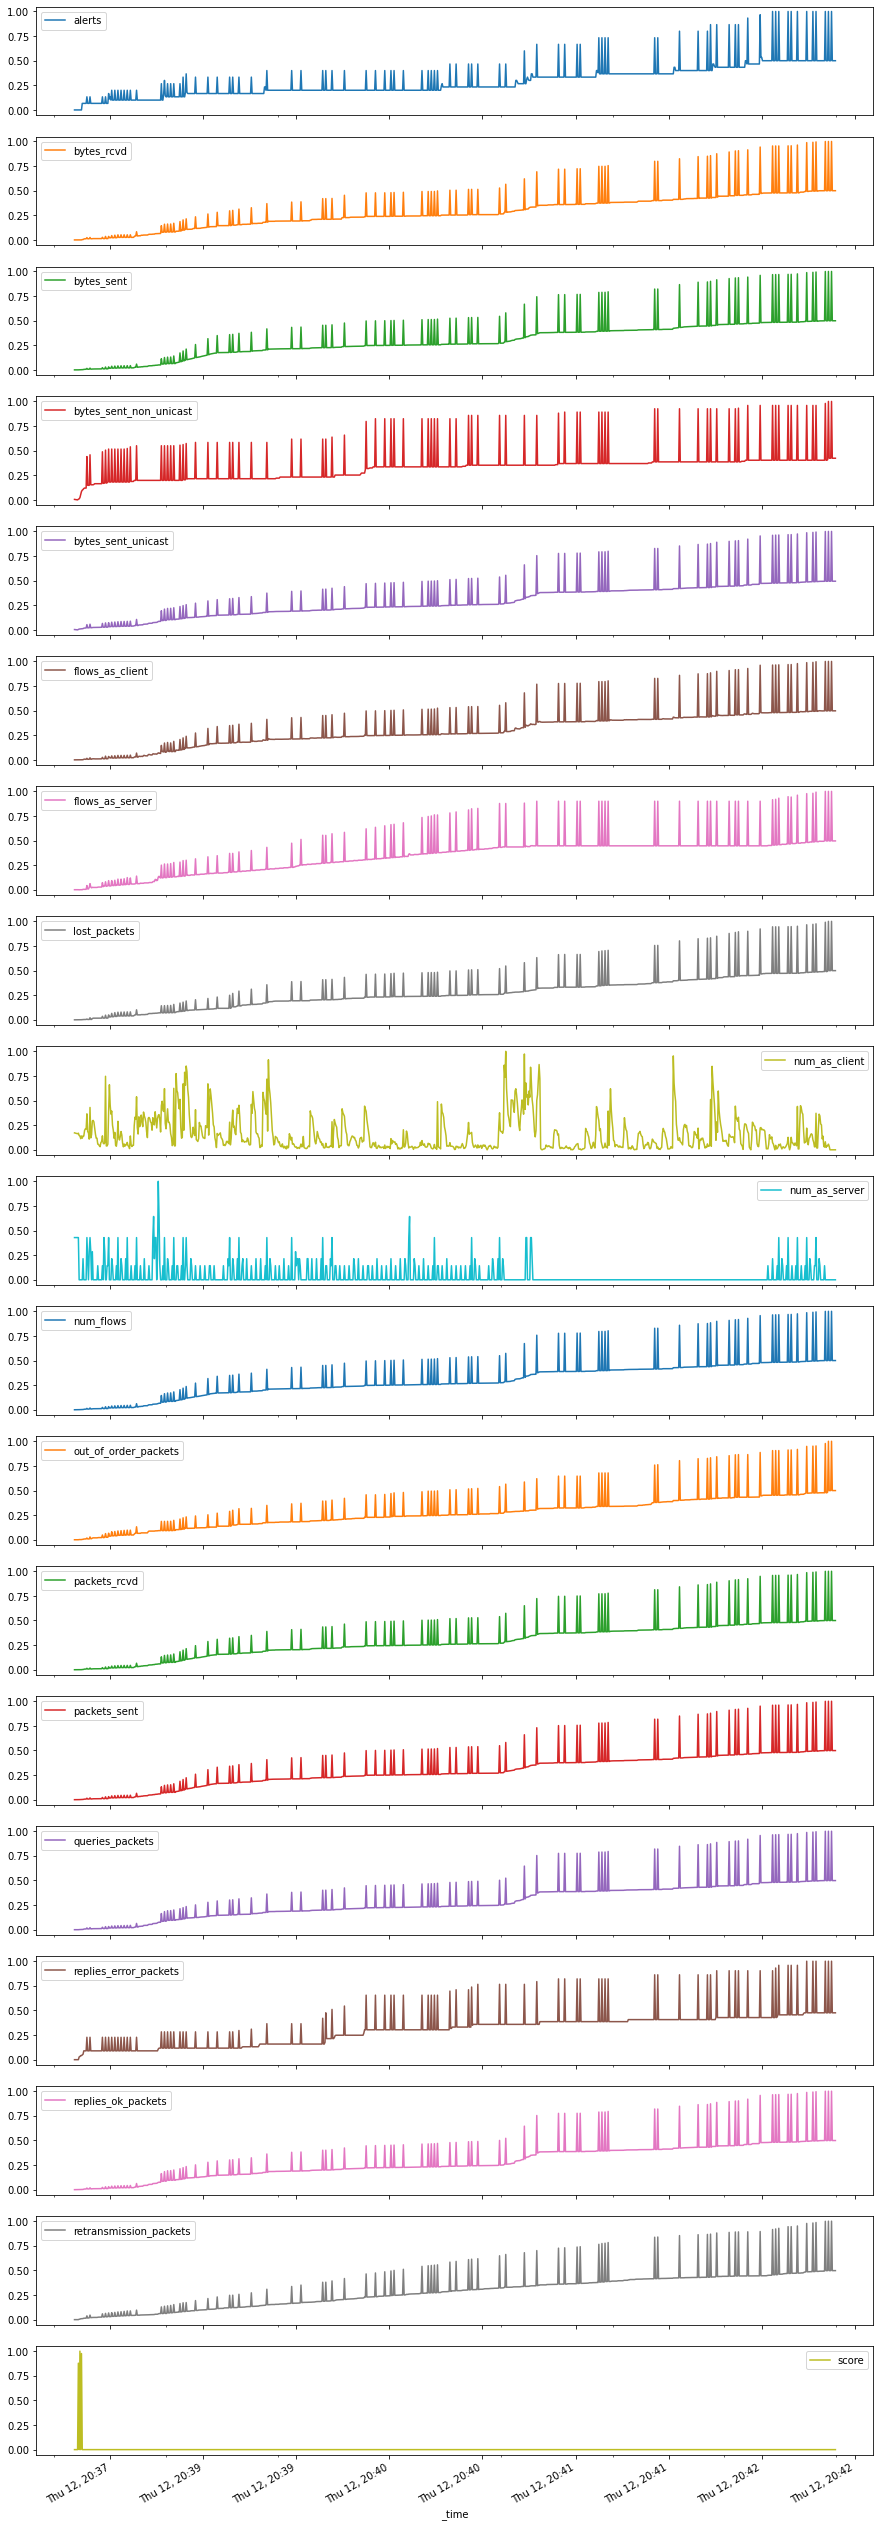

Nan values 6

_field,alerts,bytes_rcvd,bytes_sent,bytes_sent_non_unicast,bytes_sent_unicast,flows_as_client,flows_as_server,lost_packets,num_as_client,num_as_server,num_flows,out_of_order_packets,packets_rcvd,packets_sent,queries_packets,replies_error_packets,replies_ok_packets,retransmission_packets,score
_time,,,,,,,,,,,,,,,,,,,
2020-03-12 20:37:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-12 20:38:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-12 20:38:30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-03-13 04:48:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-13 04:48:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-13 04:49:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


<br>--------------------------------------------------<br>--------------------------------------------------<br>

# 192.168.10.51 (server)

Data range: 2020-03-12 20:51:00 / 2020-03-13 04:47:30 (0 days 07:56:30)

Measurements available: 954

_field,alerts,bytes_rcvd,bytes_sent,bytes_sent_non_unicast,bytes_sent_unicast,flows_as_client,flows_as_server,lost_packets,num_as_client,num_as_server,num_flows,out_of_order_packets,packets_rcvd,packets_sent,queries_packets,replies_error_packets,replies_ok_packets,retransmission_packets,score
count,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00,954.00
mean,5.72,427419048.60,55662356.34,65339.05,790938.19,10872.87,5.04,378.82,14.19,0.01,10703.88,682.54,147977.69,133562.66,9831.72,65.24,9767.51,2860.32,0.00
std,3.30,246858398.31,33278700.27,17310.13,450586.77,6300.46,1.57,230.90,20.48,0.09,6276.24,403.81,87451.00,79111.93,5614.12,29.15,5589.19,1810.57,0.00
min,0.00,5496.00,89442.00,21196.50,774.00,11.50,1.00,0.00,0.00,0.00,4.00,0.00,13.00,101.00,7.00,2.00,5.00,0.00,0.00
25%,5.00,261116481.75,33282355.50,58780.00,517101.50,6984.75,4.00,177.00,1.67,0.00,6775.25,311.25,88581.25,79750.50,6476.00,68.00,6408.00,1326.25,0.00
50%,6.00,403748144.00,53291991.00,60886.00,766559.67,10549.33,5.00,401.67,4.50,0.00,10404.67,738.50,141406.58,128599.17,9536.67,68.00,9470.67,2980.67,0.00
75%,7.00,596180538.00,77478180.00,62992.00,1081498.00,14792.58,5.00,512.00,18.92,0.00,14656.50,913.00,206814.00,185846.25,13460.00,72.00,13390.00,4108.00,0.00
max,16.00,1402669824.00,185590398.00,128090.00,2490540.00,35074.00,12.00,1266.00,153.33,1.00,34752.00,2140.00,491644.00,443312.00,30884.00,176.00,30712.00,9036.00,0.00


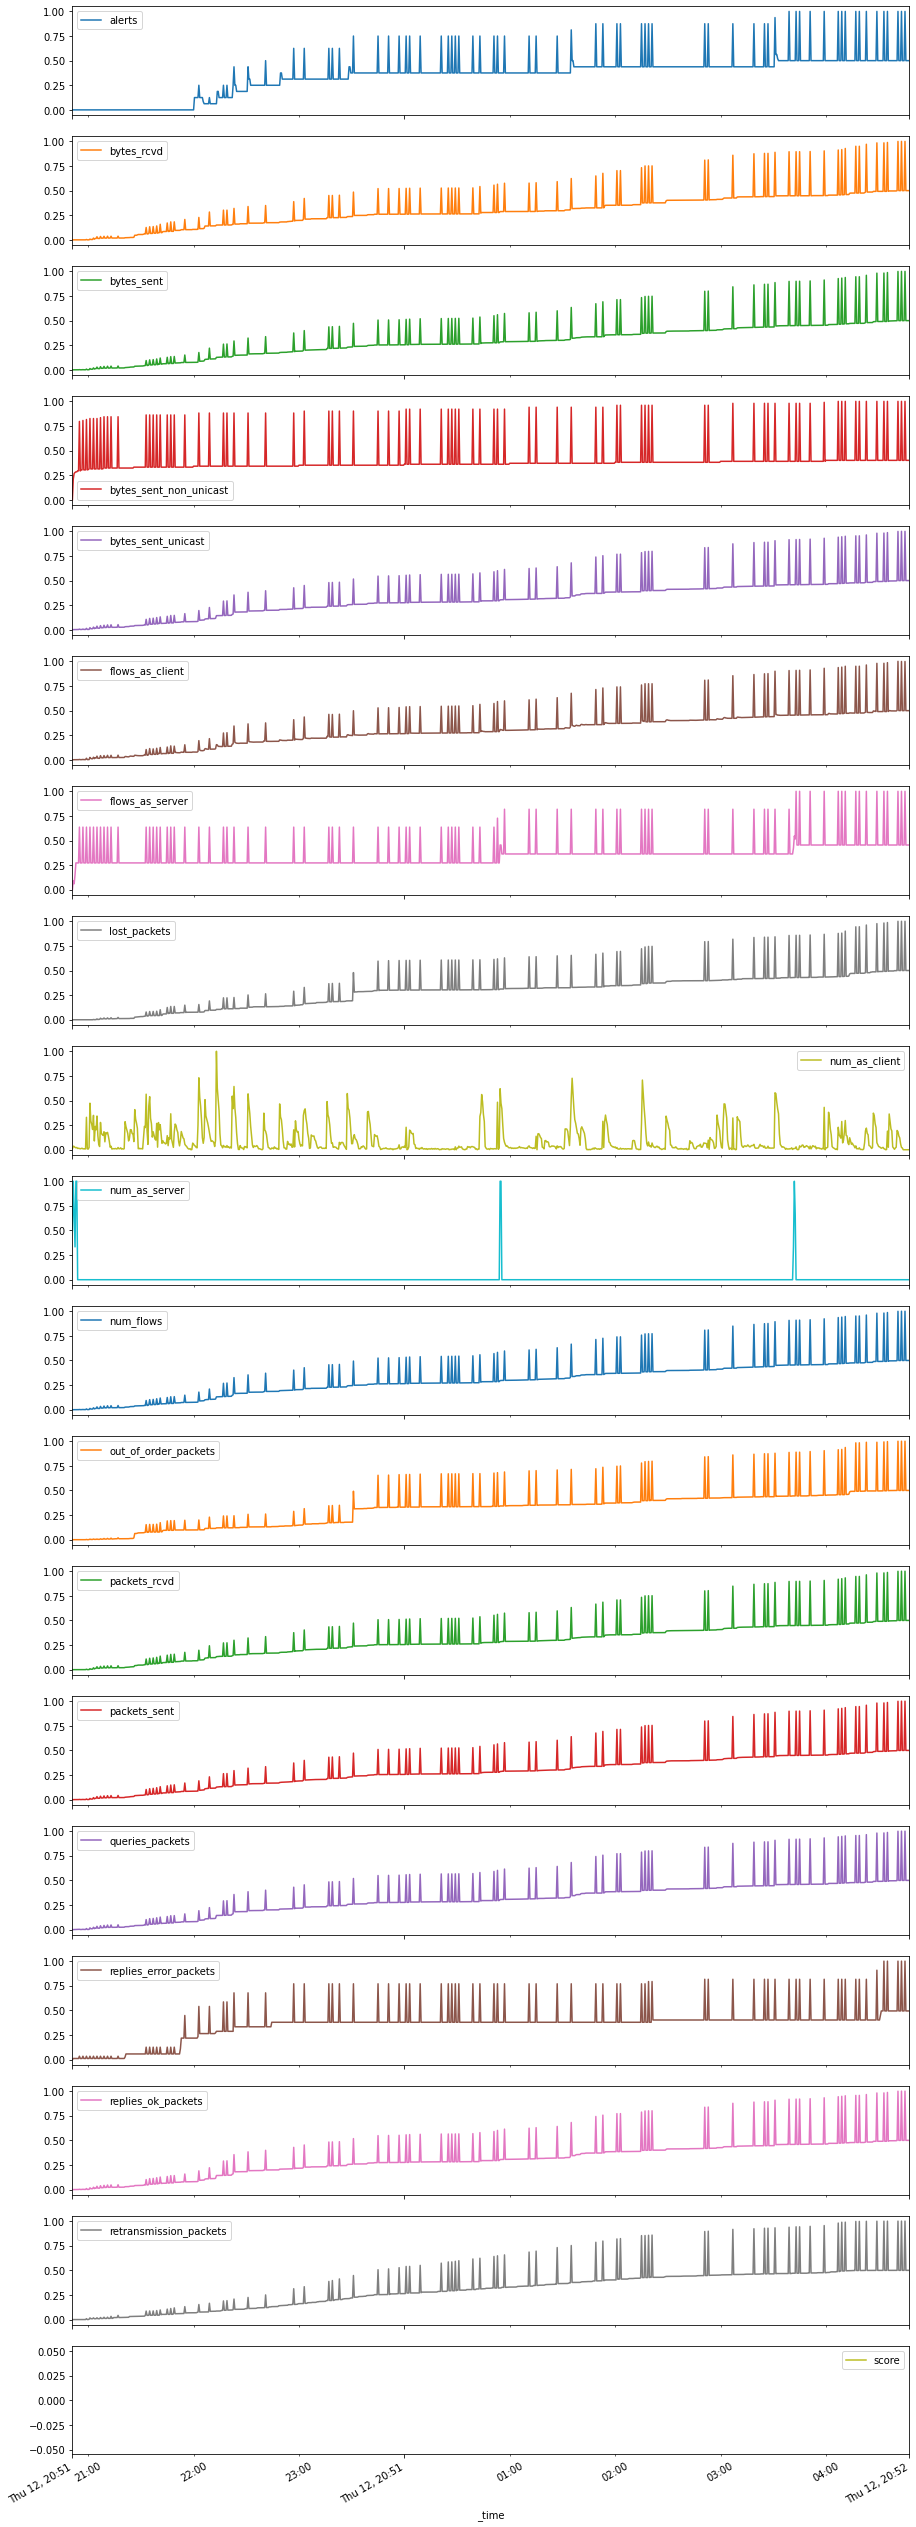

Nan values 6

_field,alerts,bytes_rcvd,bytes_sent,bytes_sent_non_unicast,bytes_sent_unicast,flows_as_client,flows_as_server,lost_packets,num_as_client,num_as_server,num_flows,out_of_order_packets,packets_rcvd,packets_sent,queries_packets,replies_error_packets,replies_ok_packets,retransmission_packets,score
_time,,,,,,,,,,,,,,,,,,,
2020-03-12 20:49:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-12 20:50:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-12 20:50:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-13 04:48:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-13 04:48:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00
2020-03-13 04:49:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00


<br>--------------------------------------------------<br>--------------------------------------------------<br>

In [9]:
devices = df.index.droplevel(2).unique()
devices = devices[[0, -1]]

for device_type, ip in devices:
    host_ts = df.loc[device_type].loc[ip]
    describe_mtimeseries(f'{ip} ({device_type})', host_ts)

# Mean value category description

In [18]:
devices = df.index.droplevel(2).unique()
devices = devices[[0, -1]]

device_type, ip = devices[0]
print(df.loc[device_type].loc["192.168.10.12"].index[0])
print(df.loc[device_type].loc["192.168.10.14"].index[0])

2020-03-12 20:37:00
2020-03-12 20:37:00


In [21]:
df.merge_by

AttributeError: 'DataFrame' object has no attribute 'merge_by'